In [7]:
##https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

In [1]:
#import packages
import pandas as pd
from pandas import Timestamp
import numpy as np
import datetime


#to plot within notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import google_sheets_api as sheet





In [2]:
def getAllSheets():
    sheet_aapl = sheet.AAPL_data.get_all_values() 
    sheet_amzn = sheet.AMZN_data.get_all_values()
    sheet_csco = sheet.CSCO_data.get_all_values()
    sheet_fb = sheet.FB_data.get_all_values()
    sheet_googl = sheet.GOOGL_data.get_all_values()
    sheet_IBM = sheet.IBM_data.get_all_values()
    sheet_intc = sheet.INTC_data.get_all_values()
    sheet_msft = sheet.MSFT_data.get_all_values()
    sheet_orcl = sheet.ORCL_data.get_all_values()
    sheet_qcom = sheet.QCOM_data.get_all_values()
    sheet_tsla = sheet.TSLA_data.get_all_values()
    sheet_vz = sheet.VZ_data.get_all_values()

    sheet_aapl = sheet_aapl[1:] #remove column names title
    sheet_amzn = sheet_amzn[1:] #remove column names title
    sheet_csco = sheet_csco[1:] #remove column names title
    sheet_fb = sheet_fb[1:] #remove column names title
    sheet_googl = sheet_googl[1:] #remove column names title
    sheet_intc = sheet_intc[1:] #remove column names title
    sheet_msft = sheet_msft[1:] #remove column names title
    sheet_csco = sheet_csco[1:] #remove column names title
    sheet_orcl = sheet_orcl[1:] #remove column names title
    sheet_qcom = sheet_qcom[1:] #remove column names title
    sheet_tsla = sheet_tsla[1:] #remove column names title
    sheet_vz = sheet_vz[1:] #remove column names title


    
    AAPL_data = pd.DataFrame(sheet_aapl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    AMZN_data = pd.DataFrame(sheet_amzn, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    CSCO_data = pd.DataFrame(sheet_csco, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    FB_data = pd.DataFrame(sheet_fb, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    GOOGL_data = pd.DataFrame(sheet_googl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    INTC_data = pd.DataFrame(sheet_intc, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    MSFT_data = pd.DataFrame(sheet_msft, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    CSCO_data = pd.DataFrame(sheet_csco, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    ORCL_data = pd.DataFrame(sheet_orcl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    QCOM_data = pd.DataFrame(sheet_qcom, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    TSLA_data = pd.DataFrame(sheet_tsla, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    VZ_data = pd.DataFrame(sheet_vz, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 


    return [AAPL_data, AMZN_data, CSCO_data, FB_data, GOOGL_data, INTC_data, MSFT_data, CSCO_data, ORCL_data, QCOM_data, TSLA_data, VZ_data]

    
all_stock_data = getAllSheets()


In [3]:

df = all_stock_data[0] #AAPL

df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(int)


for index, row in df.iterrows():    
    if row['timestamp'].endswith('-05:00'):
        df['timestamp'].iloc[index] = row['timestamp'][:-6]
        #df['timestamp'].iloc[index] = datetime.datetime.strptime(row['timestamp'], '%Y-%m-%d %H:%M:%S')

        
        
df.index = df['timestamp']

print(df)

#date_time_obj = datetime.datetime.strptime(df['timestamp'].iloc[0], '%Y-%m-%d %H:%M:%S')
#print(date_time_obj)


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                               timestamp symbol  tradingDay      open  \
timestamp                                                               
2019-02-06 09:30:00  2019-02-06 09:30:00   AAPL  2019-02-06  173.9042   
2019-02-06 09:40:00  2019-02-06 09:40:00   AAPL  2019-02-06  173.3167   
2019-02-06 09:50:00  2019-02-06 09:50:00   AAPL  2019-02-06  173.6154   
2019-02-06 10:00:00  2019-02-06 10:00:00   AAPL  2019-02-06  172.9044   
2019-02-06 10:10:00  2019-02-06 10:10:00   AAPL  2019-02-06  172.5400   
2019-02-06 10:20:00  2019-02-06 10:20:00   AAPL  2019-02-06  172.5002   
2019-02-06 10:30:00  2019-02-06 10:30:00   AAPL  2019-02-06  172.7193   
2019-02-06 10:40:00  2019-02-06 10:40:00   AAPL  2019-02-06  173.1872   
2019-02-06 10:50:00  2019-02-06 10:50:00   AAPL  2019-02-06  173.5059   
2019-02-06 11:00:00  2019-02-06 11:00:00   AAPL  2019-02-06  173.5507   
2019-02-06 11:10:00  2019-02-06 11:10:00   AAPL  2019-02-06  173.8942   
2019-02-06 11:20:00  2019-02-06 11:20:00   AAPL  20

721


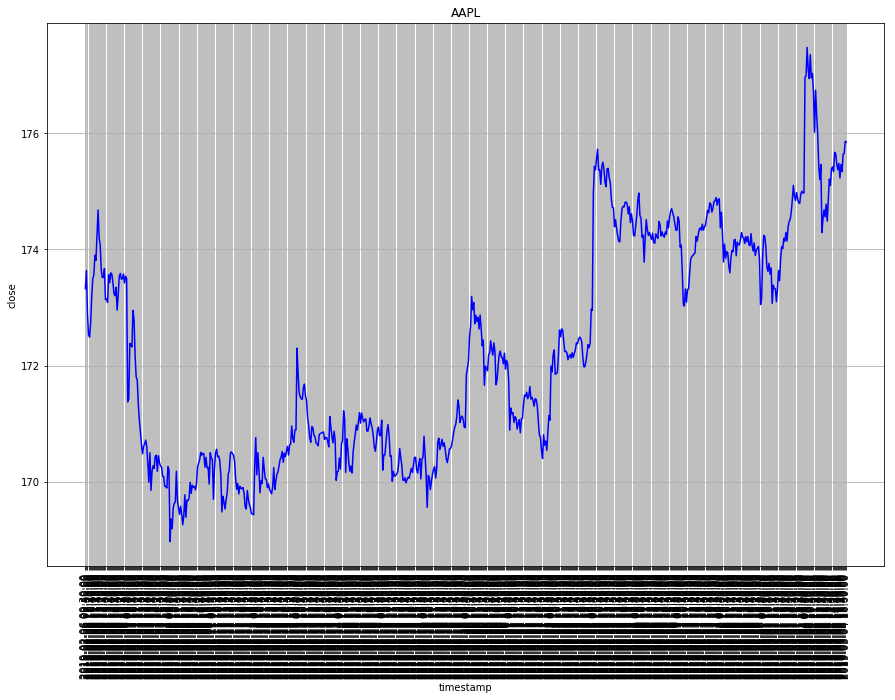

In [4]:
plt.figure(figsize=(15,10))
#plt.axes(xscale='linear', yscale='linear')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.xlabel('timestamp')
plt.ylabel('close')
plt.title('AAPL') 
plt.grid(True)

#ax = plt.axes(xscale='linear', yscale='linear')
#ax.yaxis.set_major_locator(plt.NullLocator())
#ax.xaxis.set_major_formatter(plt.NullLocator())

plt.xticks(rotation='vertical')

plt.plot(df['timestamp'], df['close'], 'b')

total_rows = df.count()
print(total_rows['close'] +1)

training_data_split = int(total_rows['close']*0.8)




In [5]:
#LONG SHORT TERM MEMORY MACHINE LEARNING

In [6]:
#importing required libraries
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [7]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['timestamp', 'close'])

print(new_data['timestamp'][0])
print(data['timestamp'][0])

for i in range(0,len(data)):
    new_data['timestamp'][i] = data['timestamp'][i]
    new_data['close'][i] = data['close'][i]

nan
2019-02-06 09:30:00


In [8]:
#setting index
new_data.index = new_data.timestamp
new_data.drop('timestamp', axis=1, inplace=True)

In [9]:
#creating train and test sets
dataset = new_data.values
train = dataset[0:training_data_split,:]
valid = dataset[training_data_split:,:]

In [10]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 44s - loss: 0.0047


In [12]:
#predicting 83 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [13]:
rms=np.sqrt(np.mean(np.power((valid.astype(float)-closing_price),2)))
rms

0.48169612615290514

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'AAPL CLOSE')

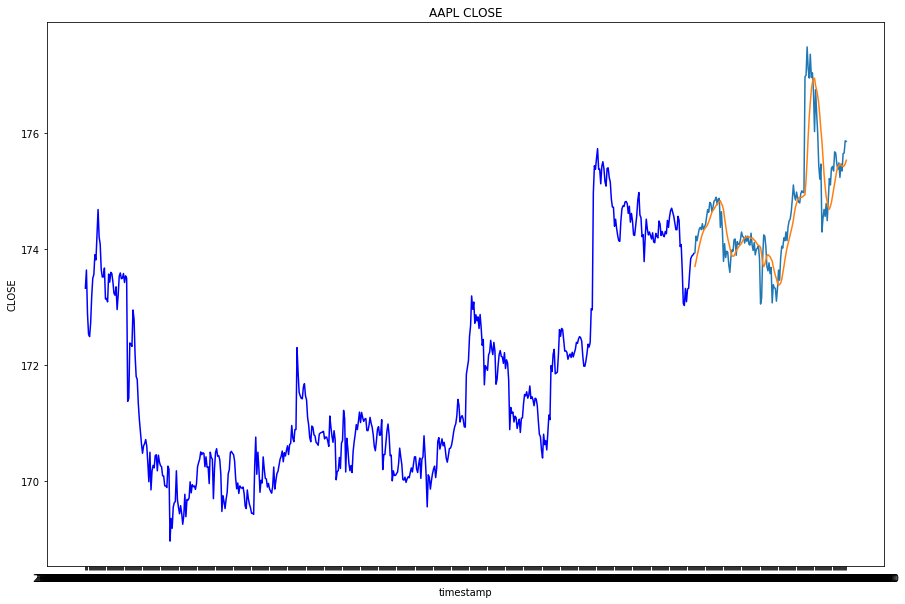

In [14]:
#for plotting
train = new_data[:training_data_split]
valid = new_data[training_data_split:]
valid['Predictions'] = closing_price
plt.figure(figsize=(15,10))

plt.plot(train['close'], 'b')
plt.plot(valid[['close','Predictions']])

plt.xlabel('timestamp')
plt.ylabel('CLOSE')
plt.title('AAPL CLOSE') 

#valid.to_csv("output", sep='\t')


nan
2019-02-06 09:30:00


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


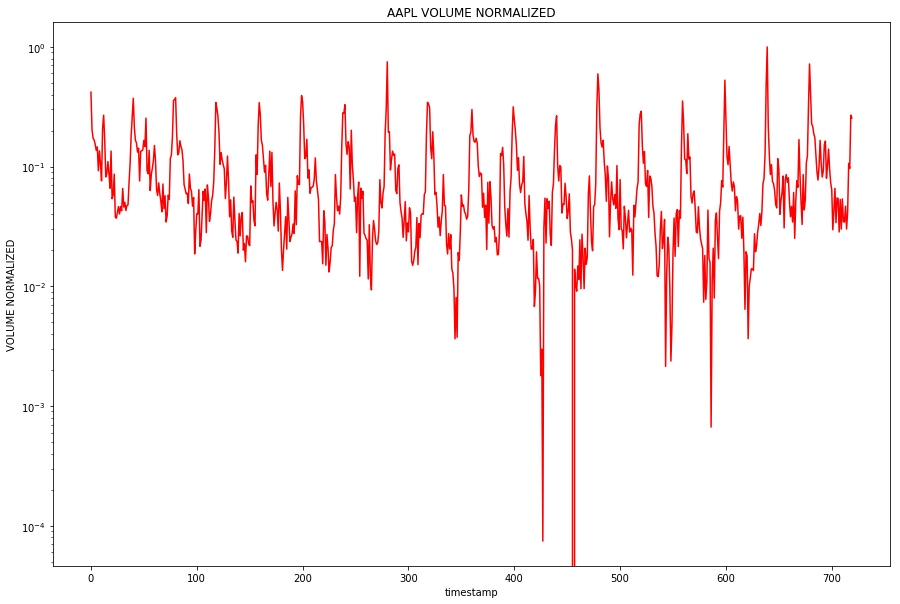

In [15]:
#reating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['timestamp', 'volume'])

print(new_data['timestamp'][0])
print(data['timestamp'][0])

for i in range(0,len(data)):
    new_data['timestamp'][i] = data['timestamp'][i]
    new_data['volume'][i] = data['volume'][i]
    
#setting index
new_data.index = new_data.timestamp
new_data.drop('timestamp', axis=1, inplace=True)


#creating train and test sets
dataset = new_data.values
train = dataset[0:training_data_split,:] #TRAINGING 80%
valid = dataset[training_data_split:,:] #DATA POINTS TO BE PREDICTED 20%

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))   #NORMALIZARION
scaled_data = scaler.fit_transform(dataset)   #FITS OUR DATA SET TO THE NORMALIZATION BETWEEN ONE AND ZERO

#plot
plt.figure(figsize=(15,10))
plt.plot(scaled_data, 'r')
plt.xlabel('timestamp')
plt.ylabel('VOLUME NORMALIZED')
plt.title('AAPL VOLUME NORMALIZED')

plt.gca().set_yscale('log')


nan
2019-02-06 09:30:00


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
 - 44s - loss: 0.0055


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'AAPL VOLUME')

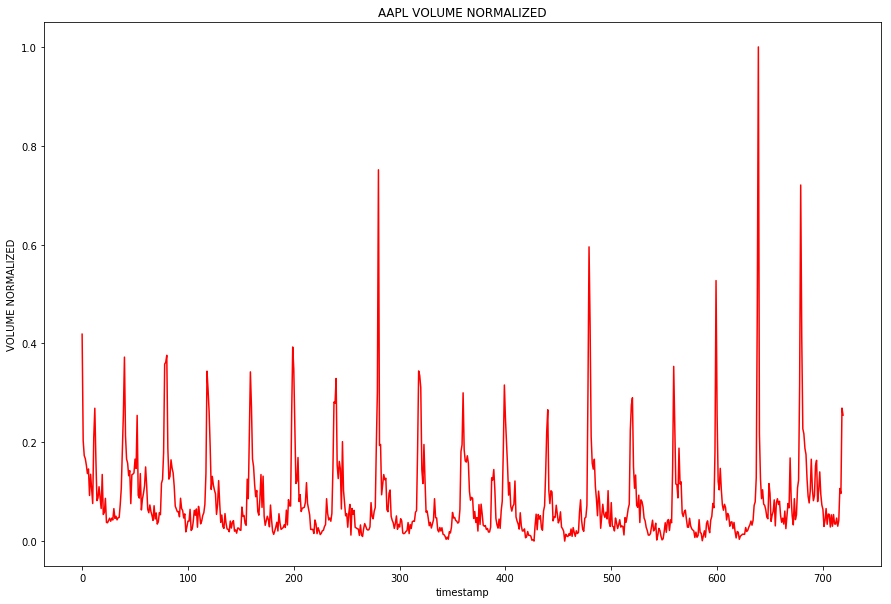

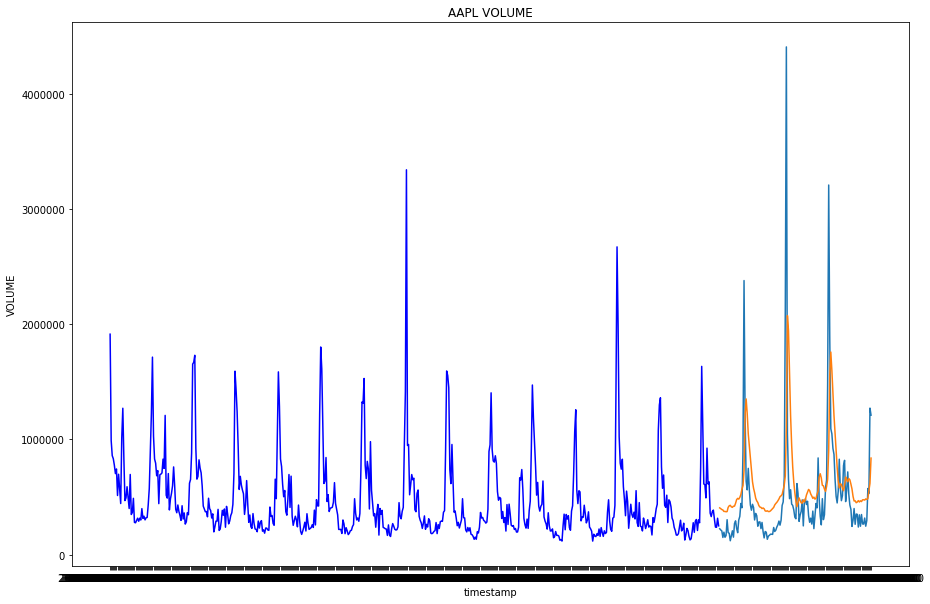

In [16]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['timestamp', 'volume'])

print(new_data['timestamp'][0])
print(data['timestamp'][0])

for i in range(0,len(data)):
    new_data['timestamp'][i] = data['timestamp'][i]
    new_data['volume'][i] = data['volume'][i]
    
#setting index
new_data.index = new_data.timestamp
new_data.drop('timestamp', axis=1, inplace=True)


#creating train and test sets
dataset = new_data.values
train = dataset[0:training_data_split,:] #TRAINGING 80%
valid = dataset[training_data_split:,:] #DATA POINTS TO BE PREDICTED 20%

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))   #NORMALIZARION
scaled_data = scaler.fit_transform(dataset)   #FITS OUR DATA SET TO THE NORMALIZATION BETWEEN ONE AND ZERO

#plot
plt.figure(figsize=(15,10))
plt.plot(scaled_data, 'r')
plt.xlabel('timestamp')
plt.ylabel('VOLUME NORMALIZED')
plt.title('AAPL VOLUME NORMALIZED') 

#train
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test) #PREDICTIONS
closing_price = scaler.inverse_transform(closing_price) #DE NORMALIZARION


rms=np.sqrt(np.mean(np.power((valid.astype(float)-closing_price),2)))
rms



#for plotting
train = new_data[:training_data_split]
valid = new_data[training_data_split:]
valid['Predictions'] = closing_price
plt.figure(figsize=(15,10))


plt.plot(train['volume'], 'b')
plt.plot(valid[['volume','Predictions']])

plt.xlabel('timestamp')
plt.ylabel('VOLUME')
plt.title('AAPL VOLUME') 


nan
2019-02-06 09:30:00


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
 - 44s - loss: 0.0058


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'AAPL high')

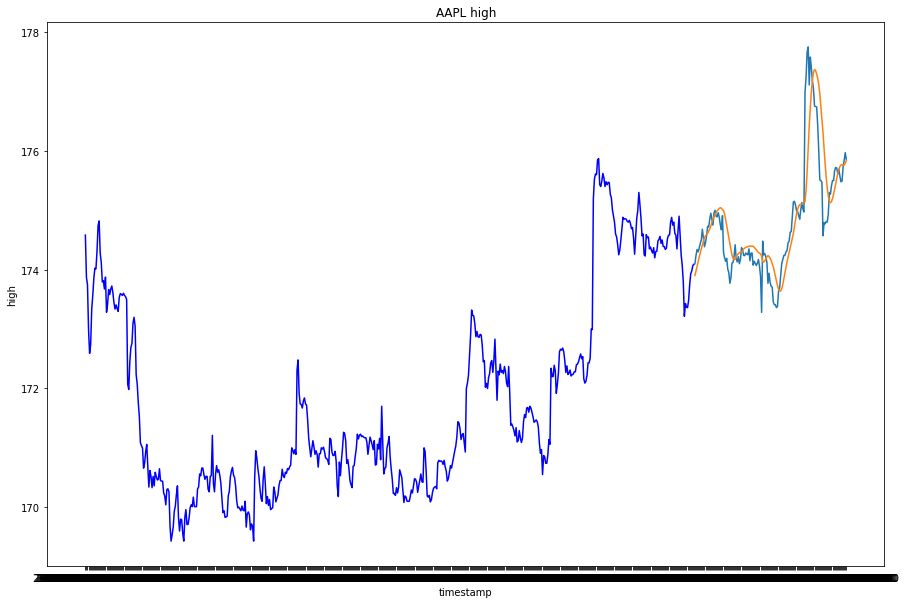

In [17]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['timestamp', 'high'])

print(new_data['timestamp'][0])
print(data['timestamp'][0])

for i in range(0,len(data)):
    new_data['timestamp'][i] = data['timestamp'][i]
    new_data['high'][i] = data['high'][i]
    
#setting index
new_data.index = new_data.timestamp
new_data.drop('timestamp', axis=1, inplace=True)


#creating train and test sets
dataset = new_data.values
train = dataset[0:training_data_split,:]
valid = dataset[training_data_split:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


rms=np.sqrt(np.mean(np.power((valid.astype(float)-closing_price),2)))
rms



#for plotting
train = new_data[:training_data_split]
valid = new_data[training_data_split:]
valid['Predictions'] = closing_price
plt.figure(figsize=(15,10))

plt.plot(train['high'], 'b')
plt.plot(valid[['high','Predictions']])

plt.xlabel('timestamp')
plt.ylabel('high')
plt.title('AAPL high') 

nan
2019-02-06 09:30:00


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
 - 43s - loss: 0.0046


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'AAPL low')

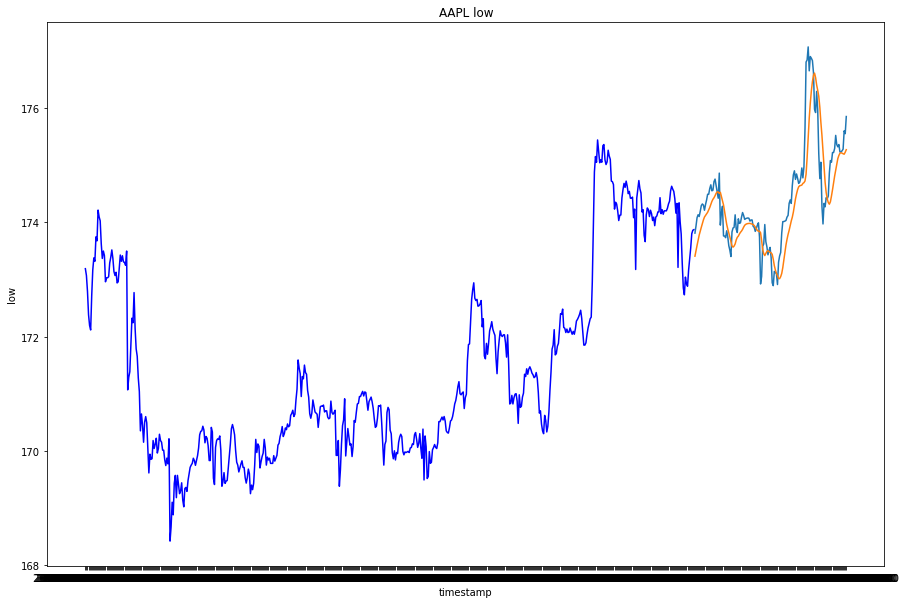

In [18]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['timestamp', 'low'])

print(new_data['timestamp'][0])
print(data['timestamp'][0])

for i in range(0,len(data)):
    new_data['timestamp'][i] = data['timestamp'][i]
    new_data['low'][i] = data['low'][i]
    
#setting index
new_data.index = new_data.timestamp
new_data.drop('timestamp', axis=1, inplace=True)


#creating train and test sets
dataset = new_data.values
train = dataset[0:training_data_split,:]
valid = dataset[training_data_split:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


rms=np.sqrt(np.mean(np.power((valid.astype(float)-closing_price),2)))
rms



#for plotting
train = new_data[:training_data_split]
valid = new_data[training_data_split:]
valid['Predictions'] = closing_price
plt.figure(figsize=(15,10))

plt.plot(train['low'], 'b')
plt.plot(valid[['low','Predictions']])

plt.xlabel('timestamp')
plt.ylabel('low')
plt.title('AAPL low') 

In [19]:
#SPLIT BY DAY

In [20]:

new_df = df
daysList = [];

def createDayDF():
    global new_df
    day_df = pd.DataFrame(columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume'])
    currentDay = new_df.iloc[0]['tradingDay']
   
    
    for index, row in new_df.iterrows():    
        if row['tradingDay'] == currentDay:
            day_df = day_df.append(row)
            #print(index)
            new_df = new_df.drop([index])

    daysList.append(day_df)
    
while(not new_df.empty): #splitting up data by data and sorting it in an array 
    createDayDF()

print(len(daysList))


18


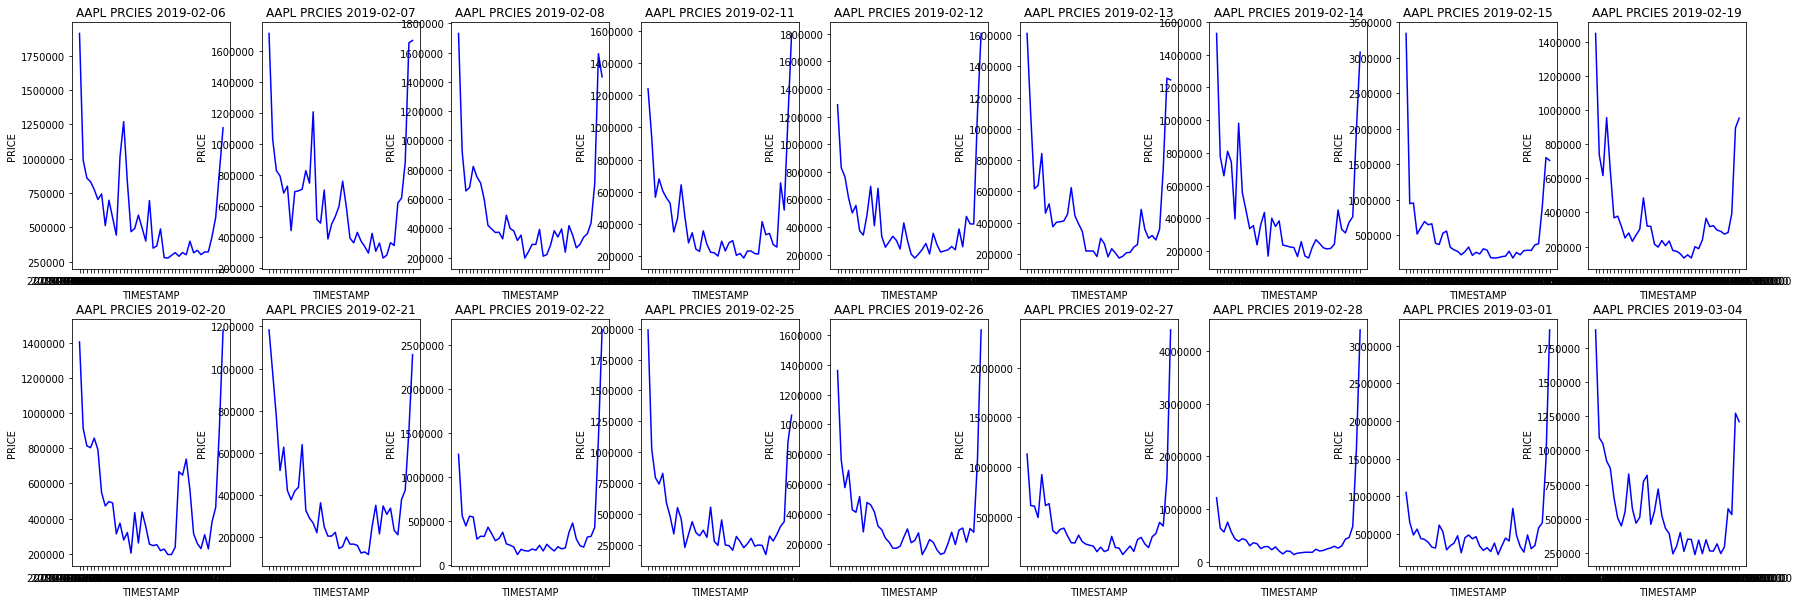

In [21]:
fig = plt.figure(figsize=(30,10))


for i in range(len(daysList)): 
    #print(daysList[i]) 
    plt.subplot(2, 9, i+1)
    #plt.plot(x, y)
    
    plt.plot(daysList[i]['volume'], 'b')
        
    plt.xlabel('TIMESTAMP')
    plt.ylabel('PRICE')
    plt.title('AAPL PRCIES ' + str(daysList[i]['tradingDay'].iloc[0])) 


plt.show()

In [22]:
#SPLIT BY WEEK

In [23]:

copy_df = df
daysList = [];
weeksList = [];

def createDayDF():
    global copy_df
    day_df = pd.DataFrame(columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume'])

    currentDay = copy_df.iloc[0]['tradingDay']

    
    for index, row in copy_df.iterrows():    
        if row['tradingDay'] == currentDay:
            day_df = day_df.append(row)
            #print(index)
            copy_df = copy_df.drop([index])

    daysList.append(day_df)
    
    

def createWeekDF():
    week_df = pd.DataFrame(columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume'])
    print()
    newWeekLength = 0 #used for days that the market is closed
    for i in range(len(daysList)): 
        currentDay = daysList[i].iloc[0]['tradingDay']
        currentDay_raw = currentDay.replace('-','')
       # print((currentDay_raw))
        dt = datetime.datetime(int(currentDay_raw[0:4]), int(currentDay_raw[4:6]), int(currentDay_raw[6:8]))
       # print(dt)
        #print(dt.weekday())
        
        
        if (len(weeksList) == 0):
            print("First week created - starting with " , dt.weekday())
            weeksList.append(daysList[i])
            
        elif (newWeekLength >= 5):
            print("more then 5, new week - starting with " , dt.weekday())
            weeksList.append(daysList[i])
            newWeekLength = 0
        else:
            if (dt.weekday() == 0): #monday new week
                print("--------")
                print("Creating New week - day ", dt.weekday())
                weeksList.append(daysList[i])
                newWeekLength = 0
            else:
                print("adding to week", dt.weekday())
                weeksList[-1] = pd.concat([weeksList[-1],daysList[i]])
                 
            #0 = monday
            #1 = tues
            #2 = wed
            #3 = thurs
            #4 = fri
        newWeekLength += 1
        
while (not copy_df.empty): #splitting up data by data and sorting it in an array 
    createDayDF()

    
createWeekDF()
#print(weeksList[0])


First week created - starting with  2
adding to week 3
adding to week 4
--------
Creating New week - day  0
adding to week 1
adding to week 2
adding to week 3
adding to week 4
more then 5, new week - starting with  1
adding to week 2
adding to week 3
adding to week 4
--------
Creating New week - day  0
adding to week 1
adding to week 2
adding to week 3
adding to week 4
more then 5, new week - starting with  0


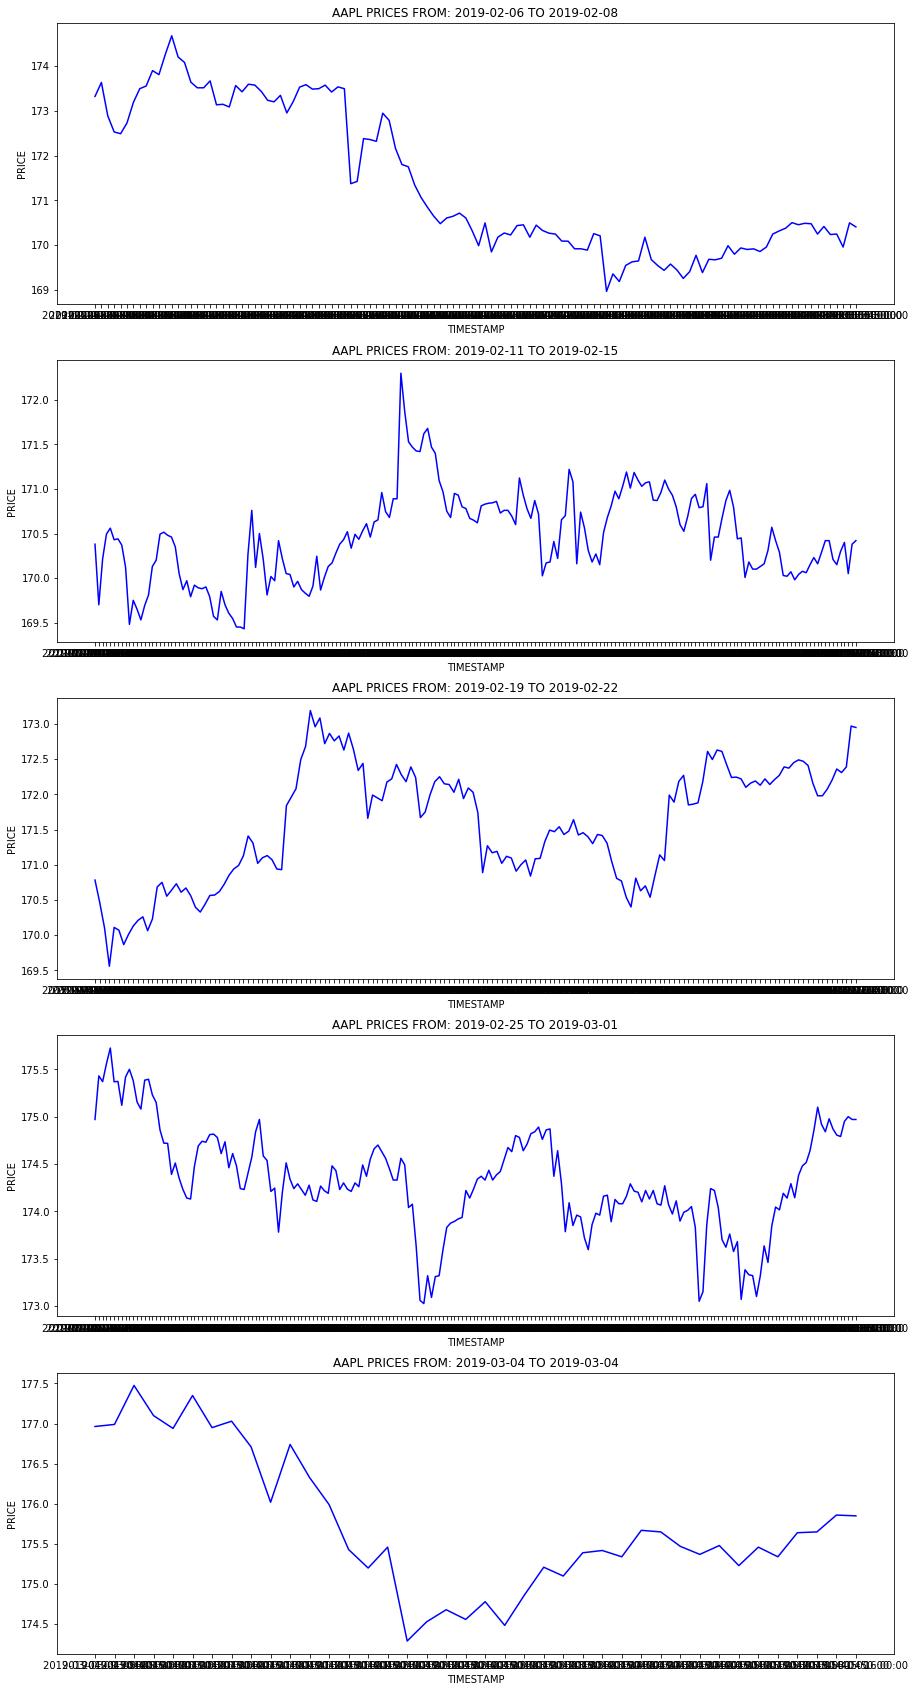

In [24]:
fig = plt.figure(figsize=(15,30))


for i in range(len(weeksList)): 
    #print(daysList[i]) 
    plt.subplot(5, 1, i+1)
    #plt.plot(x, y)
    
    plt.plot(weeksList[i]['close'], 'b')
        
    plt.xlabel('TIMESTAMP')
    plt.ylabel('PRICE')
    plt.title('AAPL PRICES FROM: ' + str(weeksList[i]['tradingDay'].iloc[0]) + " TO " + str(weeksList[i]['tradingDay'].iloc[-1])) 


plt.show()